# Лабораторная работа №5. Спектральная теория графов

In [81]:
import networkx as nx
import numpy as np
from sklearn.cluster import KMeans

# Задание 1. Кластеризация социальной сети

Количество вершин графа

In [82]:
n = 30

Сгенерируем связный граф

In [83]:
G = nx.random_geometric_graph(n, 0.25)

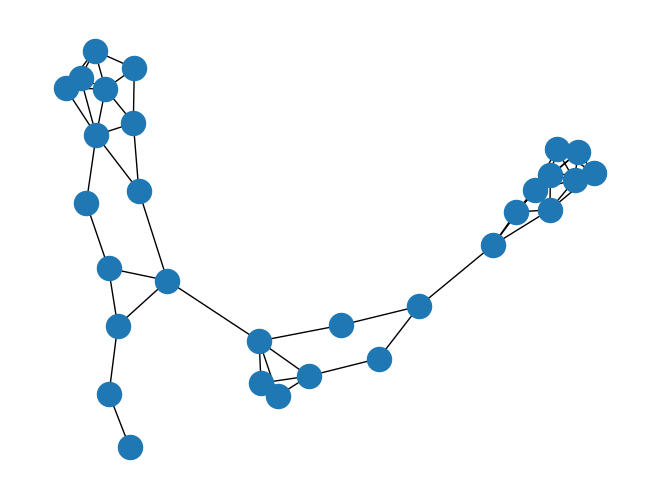

In [84]:
nx.draw(G, pos = nx.drawing.spring_layout(G))

Составим матрицу Лапласа этого графа

In [85]:
lap = np.matrix(nx.laplacian_matrix(G).toarray())

Найдем собственные числа и соответствующие им собственные векторы

In [86]:
eigenvals, eigenvects = np.linalg.eig(lap)
idx = eigenvals.argsort()   
eigenvals = eigenvals[idx]
eigenvects = eigenvects[:,idx].transpose()

Число компонент кластеризации графа

In [87]:
k = 3

Матрица из k собственных векторов, соответствующих самым маленьким собственным числам

In [88]:
v = np.column_stack([np.asarray(eigenvects[i])[0] for i in range(k)])
v.shape

(30, 3)

Применим метод k-means для кластеризации

In [89]:
kmeans = KMeans(n_clusters=k, n_init='auto')
kmeans.fit(v)

KMeans(n_clusters=3, n_init='auto')

Расскрасим исходный граф

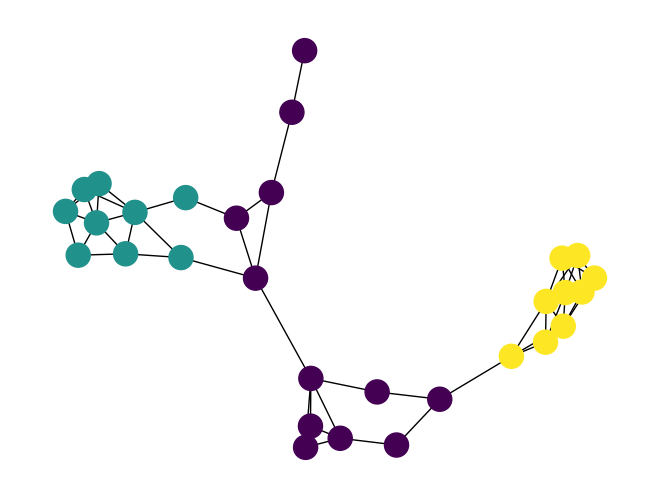

In [90]:
nx.draw(G, pos = nx.drawing.spring_layout(G), node_color = kmeans.labels_)

Почему это работает?

Наименьшие собственные числа матрицы Лапласа(за исключением 0) отражают степень связности графа. Соответствующие им собственные вектора будут отражать расстояния между вершинами в пространстве размерности k. Применив метод k-means мы можем разбить вершины на кластеры, как точки в пространстве размерности k.

# Задание 2. Google PageRank алгоритм

Количество вершин и рёбер графа

In [91]:
n = 15
e = 25

Сгенерируем связный ориентированный граф

In [92]:
G = nx.gnm_random_graph(n, e, directed = True)

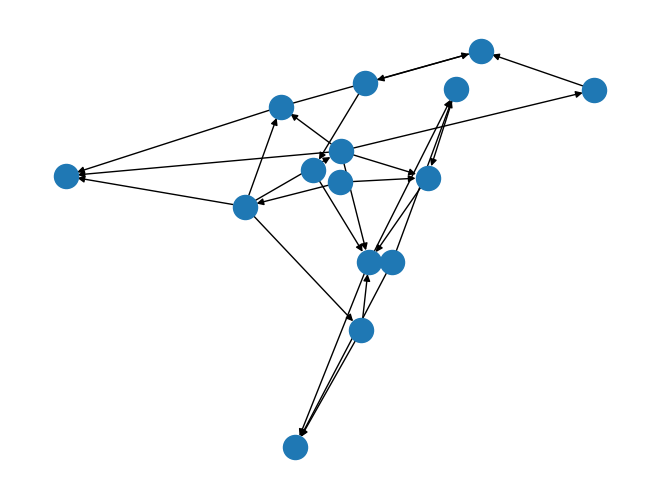

In [93]:
nx.draw(G, pos = nx.drawing.spring_layout(G))

Составим матрицу смежности графа

In [94]:
adj = nx.adjacency_matrix(G).toarray()

С помощью матрицы смежности, составим матрицу переходных вероятностей, рассматривая наш граф, как марковскую цепь

In [95]:
m = np.matrix([[adj[j][i] / sum(adj[j]) if adj[j][i]  else 0 for j in range(n)] for i in range(n)])

Найдем собственные числа и соответствующие им собственные векторы матрицы переходных вероятностей

In [96]:
eigenvals, eigenvects = np.linalg.eig(m)
idx = eigenvals.argsort()   
eigenvals = eigenvals[idx]
eigenvects = eigenvects[:,idx].transpose()

Коэффициент затухания и количество итераций

In [178]:
d = 0.85
num_iterations = 1000

Итерационный процесс для нахождения вектора PageRank

In [183]:
v = np.ones((n, 1)) / n

for i in range(num_iterations):
    v = d * m * v + (1 - d) / n * np.ones((n, 1))

v

matrix([[0.05979799],
        [0.01302813],
        [0.02172114],
        [0.01      ],
        [0.0268608 ],
        [0.01302813],
        [0.01524291],
        [0.01221478],
        [0.03283168],
        [0.10717173],
        [0.03790693],
        [0.01      ],
        [0.06533494],
        [0.06729307],
        [0.01425   ]])

Визуализация PageRank

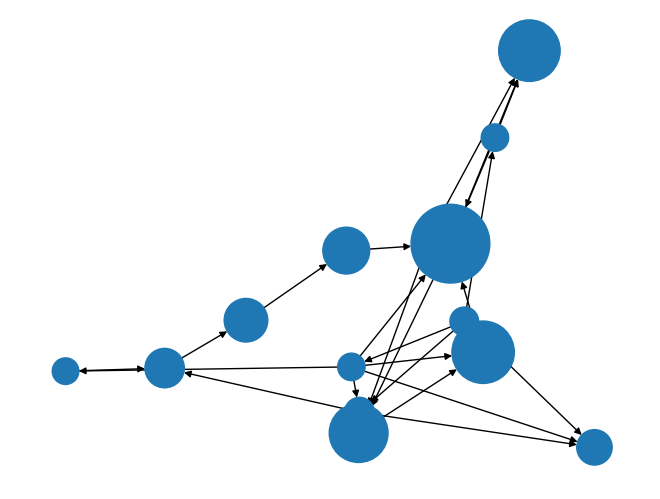

In [182]:
nx.draw(G, pos = nx.drawing.spring_layout(G), node_size = [s * 30000 for s in v.reshape((15,)).tolist()[0]])

Логика алгоритма

Матрица M является матрицей вероятностей марковской цепи (мы можем рассматривать наш ориентированный граф как марковскую цепь). Коэффициент затухания d - вероятность того, что пользователь продолжит переходить по ссылкам на странице (Обычно используется значение 0.85).